<a href="https://colab.research.google.com/github/Awangnugrawan/Natural-Languange-Processing-from-UDEMY/blob/main/Disneyland_reviews(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LIBRARY

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
import matplotlib

#DATA ANALYSIS

In [139]:


df= pd.read_csv('/content/drive/MyDrive/Machine learning/DisneylandReviews.csv', encoding= "latin-1")

In [140]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [142]:
df.describe()

,Review_ID,Rating
count,4.265600e+04,42656.000000
mean,3.188553e+08,4.217695
std,1.657092e+08,1.063371
min,1.398724e+06,1.000000
25%,1.743274e+08,4.000000
50%,2.907583e+08,5.000000
75%,4.489579e+08,5.000000
max,6.708014e+08,5.000000


In [143]:
blank=[]
for index in df['Review_Text']:
  if index.isspace() == True:
    blank.append(index)

print(len(blank))

0


In [144]:
df['Rating'].value_counts().sort_values()

1     1499
2     2127
3     5109
4    10775
5    23146
Name: Rating, dtype: int64

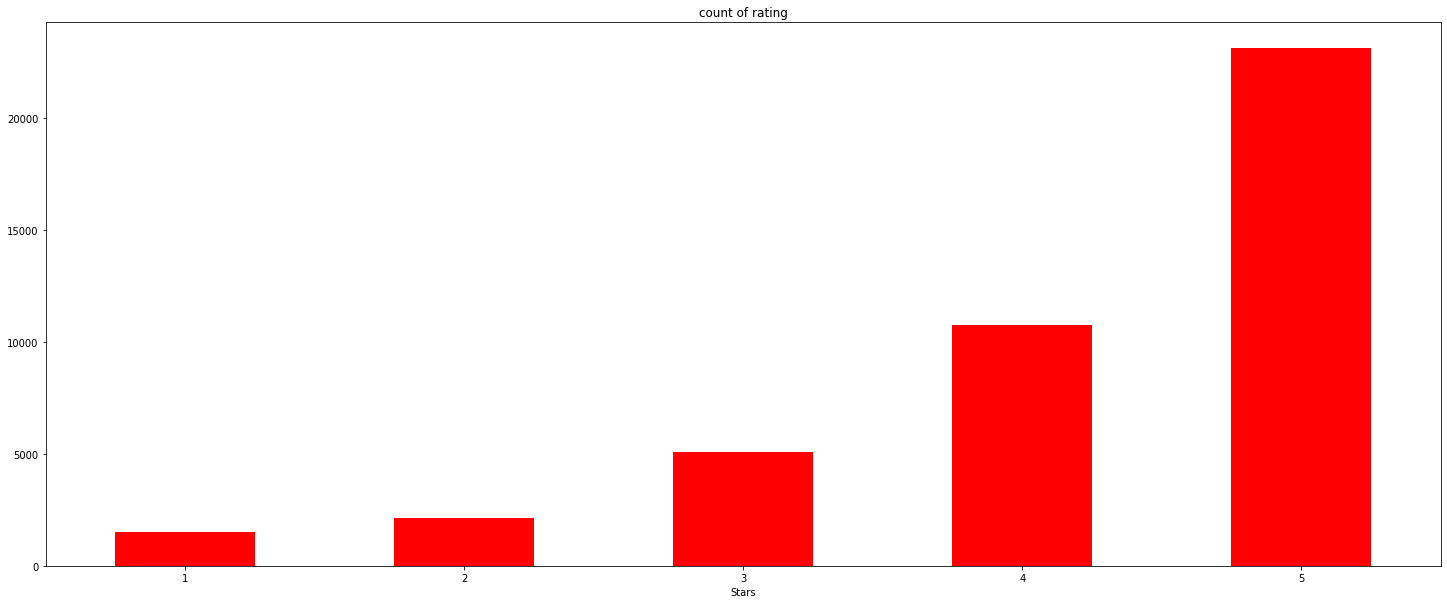

In [145]:
df['Rating'].value_counts().sort_values().plot(kind="bar", title= "count of rating",figsize=(25,10), color='red',xlabel= ('Stars'))
plt.xticks(rotation=360)
plt.show()

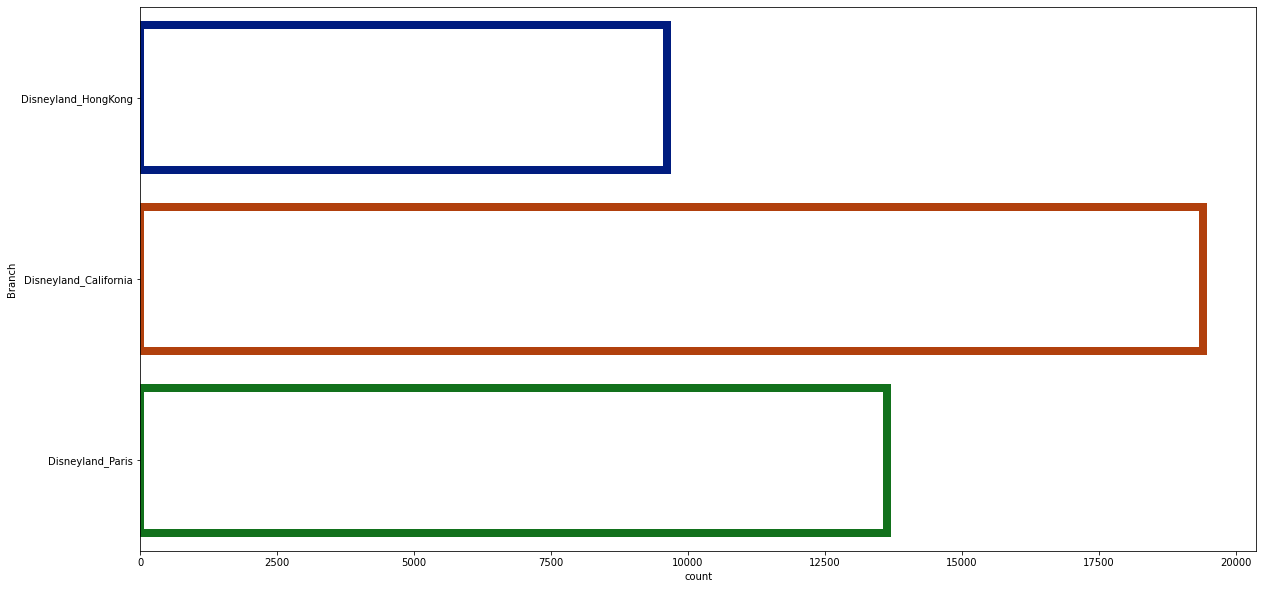

In [146]:
sns.countplot(y=df['Branch'],facecolor =(1,1,1,1), linewidth=8, edgecolor= sns.color_palette('dark',4))

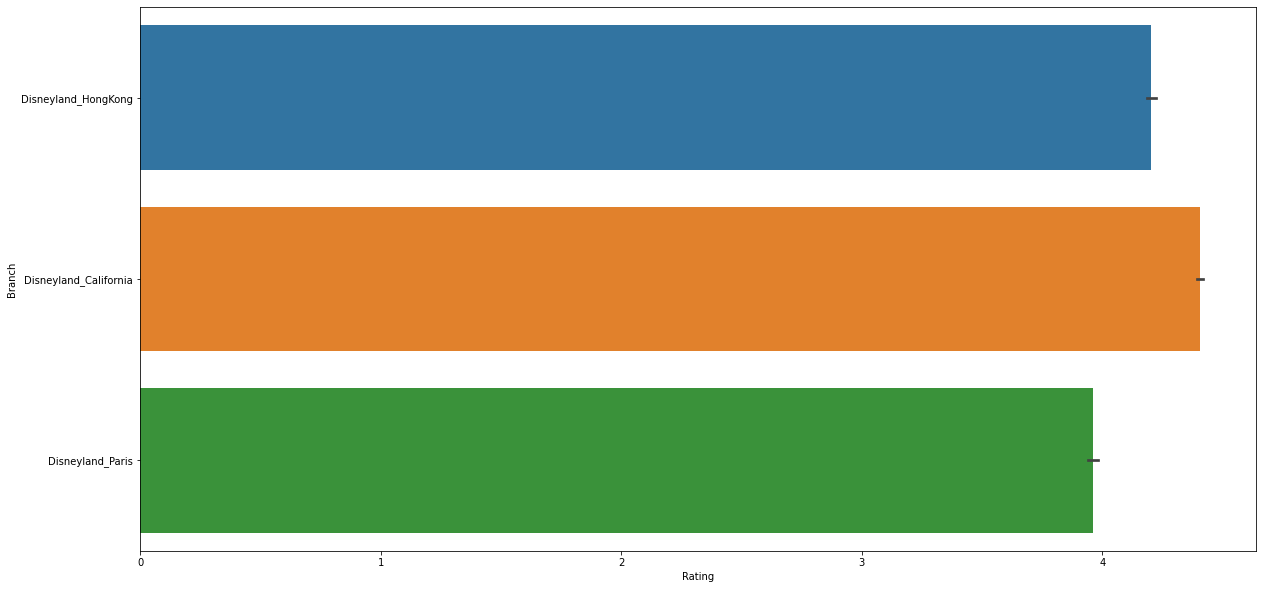

In [147]:
sns.barplot(y = df['Branch'], x = df['Rating'])

In [148]:
df.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')

In [149]:
df= df.drop(df.columns[[0,2,3,5]],axis=1 )

df



,Rating,Review_Text
0,4,If you've ever been to Disneyland anywhere you...
1,4,Its been a while since d last time we visit HK...
2,4,Thanks God it wasn t too hot or too humid wh...
3,4,HK Disneyland is a great compact park. Unfortu...
4,4,"the location is not in the city, took around 1..."
...,...,...
42651,5,i went to disneyland paris in july 03 and thou...
42652,5,2 adults and 1 child of 11 visited Disneyland ...
42653,5,My eleven year old daughter and myself went to...
42654,4,"This hotel, part of the Disneyland Paris compl..."


In [150]:
df= df[['Review_Text','Rating']]

In [151]:
df.isna().sum()

Review_Text    0
Rating         0
dtype: int64

In [152]:
df.duplicated().sum()

23

In [153]:
df.drop_duplicates(inplace= True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [154]:
df.duplicated().sum()

0

In [155]:
def rating(rating):
  if rating >=3 and rating <=5:
    return "Positive"
  else:
    return "Negative"


In [156]:
df['RATING_Positive/Negative'] = df['Rating'].apply(rating)

<ipython-input-156-56f9b6a96801>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RATING_Positive/Negative'] = df['Rating'].apply(rating)


In [157]:
df.head()

,Review_Text,Rating,RATING_Positive/Negative
0,If you've ever been to Disneyland anywhere you...,4,Positive
1,Its been a while since d last time we visit HK...,4,Positive
2,Thanks God it wasn t too hot or too humid wh...,4,Positive
3,HK Disneyland is a great compact park. Unfortu...,4,Positive
4,"the location is not in the city, took around 1...",4,Positive


In [158]:
df['RATING_Positive/Negative'].value_counts()

Positive    39009
Negative     3624
Name: RATING_Positive/Negative, dtype: int64

#SENTIMENT ANALYSIS

In [159]:
nltk.download('vader_lexicon') #Lexicon ini merupakan kumpulan kata-kata dan atribut emosional yang terkait dengan kata-kata tersebut, yang digunakan untuk menganalisis sentimen dalam teks.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [160]:
sentanalyze = SentimentIntensityAnalyzer()

In [161]:
df['Score']= df['Review_Text'].apply(lambda review : sentanalyze.polarity_scores(review))

<ipython-input-161-e2fd83cfc7e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score']= df['Review_Text'].apply(lambda review : sentanalyze.polarity_scores(review))


In [162]:
df

,Review_Text,Rating,RATING_Positive/Negative,Score
0,If you've ever been to Disneyland anywhere you...,4,Positive,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp..."
1,Its been a while since d last time we visit HK...,4,Positive,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp..."
2,Thanks God it wasn t too hot or too humid wh...,4,Positive,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co..."
3,HK Disneyland is a great compact park. Unfortu...,4,Positive,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo..."
4,"the location is not in the city, took around 1...",4,Positive,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp..."
...,...,...,...,...
42651,i went to disneyland paris in july 03 and thou...,5,Positive,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp..."
42652,2 adults and 1 child of 11 visited Disneyland ...,5,Positive,"{'neg': 0.02, 'neu': 0.776, 'pos': 0.204, 'com..."
42653,My eleven year old daughter and myself went to...,5,Positive,"{'neg': 0.021, 'neu': 0.881, 'pos': 0.098, 'co..."
42654,"This hotel, part of the Disneyland Paris compl...",4,Positive,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp..."


In [163]:
df['compound']= df['Score'].apply(lambda f: f['compound'])

<ipython-input-163-a372eceef4f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compound']= df['Score'].apply(lambda f: f['compound'])


In [164]:
df

,Review_Text,Rating,RATING_Positive/Negative,Score,compound
0,If you've ever been to Disneyland anywhere you...,4,Positive,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069
1,Its been a while since d last time we visit HK...,4,Positive,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901
2,Thanks God it wasn t too hot or too humid wh...,4,Positive,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920
3,HK Disneyland is a great compact park. Unfortu...,4,Positive,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489
4,"the location is not in the city, took around 1...",4,Positive,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.2846
...,...,...,...,...,...
42651,i went to disneyland paris in july 03 and thou...,5,Positive,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.9860
42652,2 adults and 1 child of 11 visited Disneyland ...,5,Positive,"{'neg': 0.02, 'neu': 0.776, 'pos': 0.204, 'com...",0.9909
42653,My eleven year old daughter and myself went to...,5,Positive,"{'neg': 0.021, 'neu': 0.881, 'pos': 0.098, 'co...",0.8402
42654,"This hotel, part of the Disneyland Paris compl...",4,Positive,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",0.9538


In [165]:
df['compound_positive/negative']= df['compound'].apply(lambda score: 'Positive' if score>=0 else 'Negative')

<ipython-input-165-e84b33b7bc87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compound_positive/negative']= df['compound'].apply(lambda score: 'Positive' if score>=0 else 'Negative')


In [166]:
df.head()

,Review_Text,Rating,RATING_Positive/Negative,Score,compound,compound_positive/negative
0,If you've ever been to Disneyland anywhere you...,4,Positive,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069,Positive
1,Its been a while since d last time we visit HK...,4,Positive,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901,Positive
2,Thanks God it wasn t too hot or too humid wh...,4,Positive,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920,Positive
3,HK Disneyland is a great compact park. Unfortu...,4,Positive,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489,Positive
4,"the location is not in the city, took around 1...",4,Positive,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.2846,Positive


In [167]:
accuracy_score(df['RATING_Positive/Negative'],df['compound_positive/negative'])

0.8900616893017146

#TEXT CLASSIFICATION 

In [168]:
df= df[['Review_Text','Rating','RATING_Positive/Negative']]

In [169]:
df

,Review_Text,Rating,RATING_Positive/Negative
0,If you've ever been to Disneyland anywhere you...,4,Positive
1,Its been a while since d last time we visit HK...,4,Positive
2,Thanks God it wasn t too hot or too humid wh...,4,Positive
3,HK Disneyland is a great compact park. Unfortu...,4,Positive
4,"the location is not in the city, took around 1...",4,Positive
...,...,...,...
42651,i went to disneyland paris in july 03 and thou...,5,Positive
42652,2 adults and 1 child of 11 visited Disneyland ...,5,Positive
42653,My eleven year old daughter and myself went to...,5,Positive
42654,"This hotel, part of the Disneyland Paris compl...",4,Positive


In [170]:
X= df['Review_Text']
y= df['RATING_Positive/Negative']

In [171]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.33)

Pipeline classes are used to group different machine learning tools (such as transformers and modelers) into a unified process. This makes it possible to logically sequence the stages of the modeling process and manage the transformations performed on the data more easily.

In general, pipelines are very helpful in the modeling process and make it easier to manage the different stages of the modeling process, making the process more efficient and easy to maintain.

In [172]:
textclf =Pipeline([('tfidf', TfidfVectorizer()),('clf', LinearSVC())])

In [173]:
textclf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [174]:
predictions= textclf.predict(X_test)

In [175]:
print(accuracy_score(y_test,predictions))


0.9395124031558746


In [176]:
cm= confusion_matrix(y_test, predictions)
cm

array([[  604,   584],
       [  267, 12614]])

In [177]:

matplotlib.rc("figure",figsize = (20,10))

In [178]:
cm_display = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = [False,True])

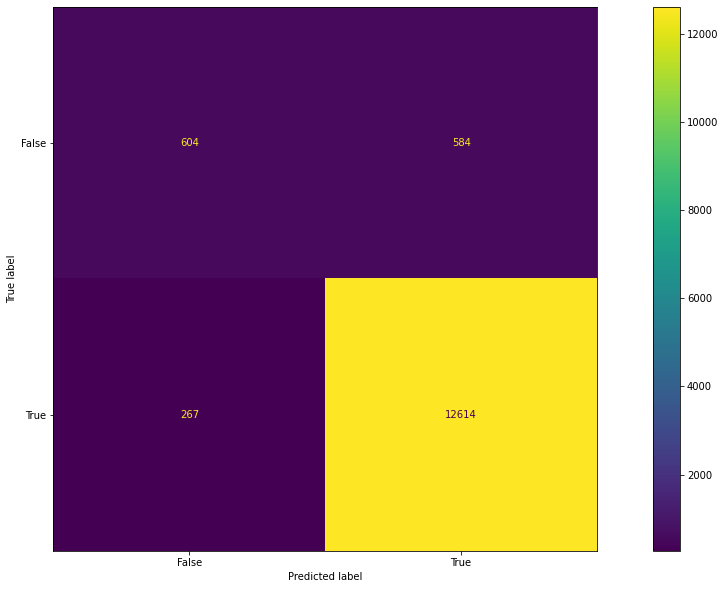

In [179]:
cm_display.plot()
plt.show()

In [180]:
newreview= (['Disneyland was perfect, i like it so much'])

In [181]:
textclf.predict(newreview)[0]

'Positive'